# UCI - Air Quality

Data from UCI ML repository

https://archive.ics.uci.edu/ml/datasets/Air+Quality

- 0 Date (DD/MM/YYYY)
- 1 Time (HH.MM.SS)
- 2 True hourly averaged concentration CO in mg/m^3 (reference analyzer)
- 3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
- 4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
- 5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
- 6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
- 7 True hourly averaged NOx concentration in ppb (reference analyzer)
- 8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
- 9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
- 10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
- 11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
- 12 Temperature in Â°C
- 13 Relative Humidity (%)
- 14 AH Absolute Humidity 

In [1]:
import pandas as pd
import numpy as np

import zipfile

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/joeba/OneDrive/Documents/ML/AirQualityUCI/AirQualityUCI.csv', 
                   sep=';') #, parse_dates=['Date_Time'])
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.rename(columns={'Date_Time':'dttm'}, inplace=True)

In [4]:
df['CO(GT)'] = df['CO(GT)'].str.replace(',','.').astype(float)
df['C6H6(GT)'] = df['C6H6(GT)'].str.replace(',','.').astype(float)
df['T'] = df['T'].str.replace(',','.').astype(float)
df['RH'] = df['RH'].str.replace(',','.').astype(float)
df['AH'] = df['AH'].str.replace(',','.').astype(float)

df['Time'] = df['Time'].str.replace('.',':') #.astype(time)

In [5]:
# get rid of extra columns and only meant to be 9358 rows of data
drop_cols = ['Unnamed: 15', 'Unnamed: 16']
df = df.drop(labels=drop_cols,axis=1)
df = df.iloc[0:9357,:]

df['Hour'] = df['Time'].apply(lambda x: int(x[:2]))

# deliberately keep the duplicate index
df = df.reset_index()
df

,index,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour
0,0,10/03/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18
1,1,10/03/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19
2,2,10/03/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20
3,3,10/03/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21
4,4,10/03/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,9352,04/04/2005,10:00:00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,10
9353,9353,04/04/2005,11:00:00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,11
9354,9354,04/04/2005,12:00:00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,12
9355,9355,04/04/2005,13:00:00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,13


In [6]:
# this and next few cells all clean the data
df.isna().sum()

index            0
Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
Hour             0
dtype: int64

In [7]:
df.dtypes

index              int64
Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
Hour               int64
dtype: object

In [8]:
df['CO(GT)']

0       2.6
1       2.0
2       2.2
3       2.2
4       1.6
       ... 
9352    3.1
9353    2.4
9354    2.4
9355    2.1
9356    2.2
Name: CO(GT), Length: 9357, dtype: float64

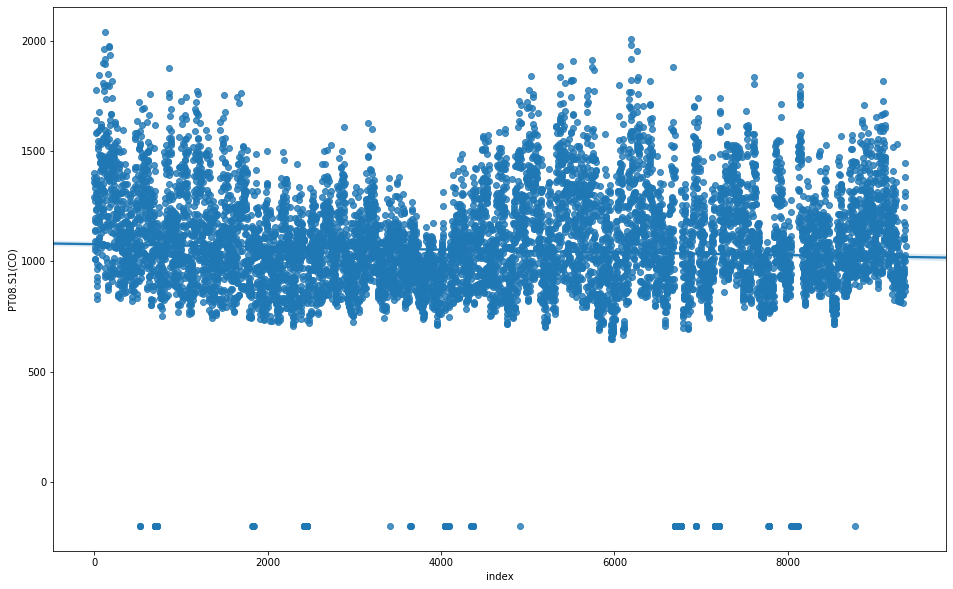

In [9]:
fig = plt.figure(figsize=(16,10))
sns.regplot('index', 'PT08.S1(CO)', data=df)

In [10]:
mar10 = df.iloc[6:30,:].copy()
#mar10['Time'] = pd.to_datetime(mar10['Time'])
mar10

,index,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour
6,6,11/03/2004,00:00:00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603,0
7,7,11/03/2004,01:00:00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702,1
8,8,11/03/2004,02:00:00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648,2
9,9,11/03/2004,03:00:00,0.6,1010.0,19.0,1.7,561.0,-200.0,1705.0,-200.0,1235.0,501.0,10.3,60.2,0.7517,3
10,10,11/03/2004,04:00:00,-200.0,1011.0,14.0,1.3,527.0,21.0,1818.0,34.0,1197.0,445.0,10.1,60.5,0.7465,4
11,11,11/03/2004,05:00:00,0.7,1066.0,8.0,1.1,512.0,16.0,1918.0,28.0,1182.0,422.0,11.0,56.2,0.7366,5
12,12,11/03/2004,06:00:00,0.7,1052.0,16.0,1.6,553.0,34.0,1738.0,48.0,1221.0,472.0,10.5,58.1,0.7353,6
13,13,11/03/2004,07:00:00,1.1,1144.0,29.0,3.2,667.0,98.0,1490.0,82.0,1339.0,730.0,10.2,59.6,0.7417,7
14,14,11/03/2004,08:00:00,2.0,1333.0,64.0,8.0,900.0,174.0,1136.0,112.0,1517.0,1102.0,10.8,57.4,0.7408,8
15,15,11/03/2004,09:00:00,2.2,1351.0,87.0,9.5,960.0,129.0,1079.0,101.0,1583.0,1028.0,10.5,60.6,0.7691,9


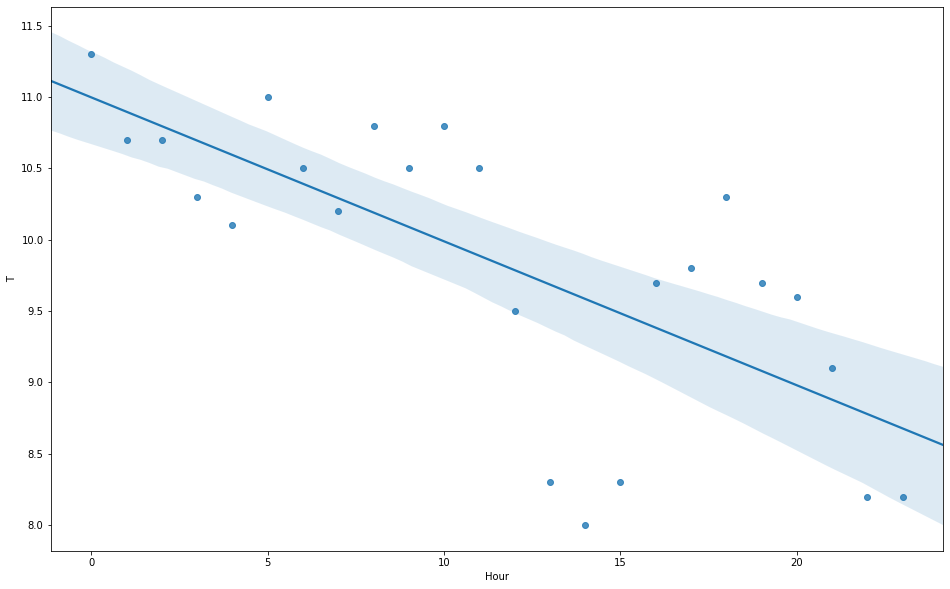

In [13]:
fig = plt.figure(figsize=(16,10))
sns.regplot(data=mar10, x='Hour', y='T')
#sns.scatterplot(data=tips, x="total_bill", y="tip")


In [ ]:
df.dtypes